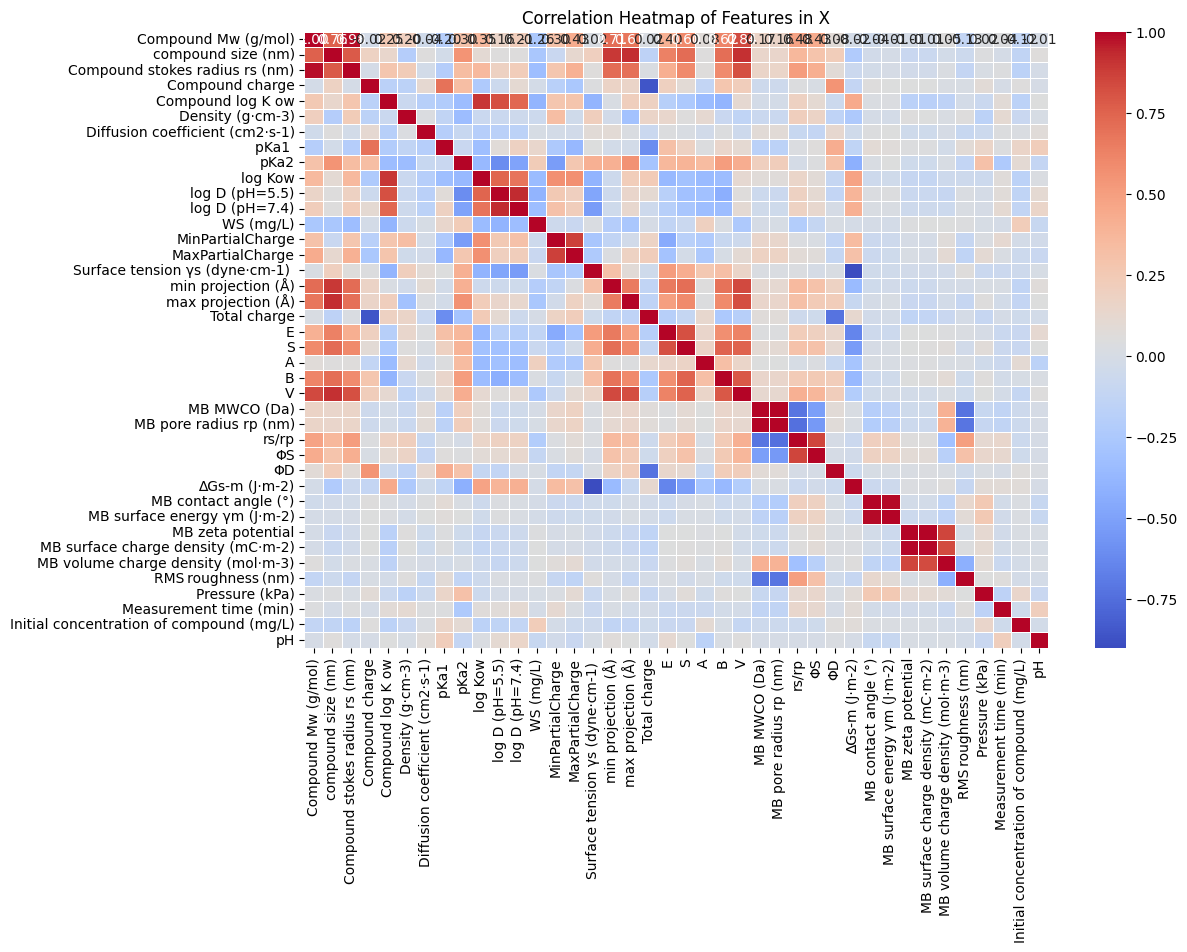

Highly correlated feature pairs (|r| > 0.7):
Compound Mw (g/mol) vs compound size (nm): r = 0.76
Compound Mw (g/mol) vs Compound stokes radius rs (nm): r = 0.98
Compound Mw (g/mol) vs min projection (Å): r = 0.71
Compound Mw (g/mol) vs V: r = 0.84
compound size (nm) vs Compound stokes radius rs (nm): r = 0.78
compound size (nm) vs min projection (Å): r = 0.89
compound size (nm) vs max projection (Å): r = 0.92
compound size (nm) vs S: r = 0.71
compound size (nm) vs B: r = 0.71
compound size (nm) vs V: r = 0.92
Compound stokes radius rs (nm) vs min projection (Å): r = 0.72
Compound stokes radius rs (nm) vs max projection (Å): r = 0.70
Compound stokes radius rs (nm) vs V: r = 0.82
Compound charge vs Total charge: r = -0.86
Compound log K ow vs log Kow: r = 0.90
Compound log K ow vs log D (pH=5.5): r = 0.82
Compound log K ow vs log D (pH=7.4): r = 0.74
log Kow vs log D (pH=5.5): r = 0.75
log D (pH=5.5) vs log D (pH=7.4): r = 0.93
MinPartialCharge vs MaxPartialCharge: r = 0.87
Surface tensi

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
datasets = pd.read_excel('ML.xlsx')
X = datasets.iloc[:, 7:47]
y = datasets.iloc[:, 47]

# Compute the correlation matrix
correlation_matrix = X.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features in X")
plt.show()

# Normalize the feature data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Recompute the correlation matrix on the scaled data
correlation_matrix = X_scaled.corr()

# Identify highly correlated feature pairs
high_corr_pairs = [
    (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
    for i in range(len(correlation_matrix.columns))
    for j in range(i + 1, len(correlation_matrix.columns))
    if abs(correlation_matrix.iloc[i, j]) > 0.7
]

# Print highly correlated feature pairs (|r| > 0.7)
print("Highly correlated feature pairs (|r| > 0.7):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} vs {feature2}: r = {corr_value:.2f}")
